In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
## do linear regression but with DL concepts

## use learning rates with gradient descent to approximate the best weight/bias pair after multiple iterations

In [49]:
np.random.seed(101) 
tf.set_random_seed(101)

In [50]:
x = np.linspace(0, 200, 200) 
y = np.linspace(0, 200, 200) 
  
# Adding noise 
x += np.random.uniform(-6, 6, 200) 
y += np.random.uniform(-10, 10, 200) 
  
n = len(x) #

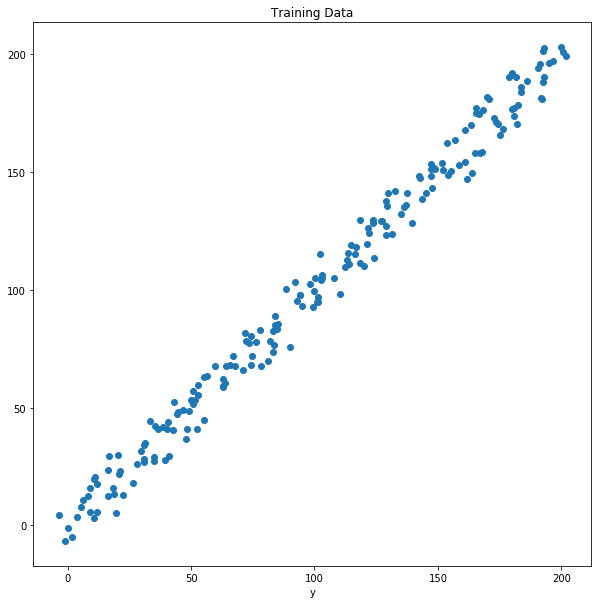

In [51]:
plt.figure(figsize = (10,10))
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [52]:
## we will optimize y = Wx + b in tensorflow

X = tf.placeholder('float')
Y = tf.placeholder('float')

In [53]:
# randomly initialized weight and bias term to optimize
W = tf.Variable(np.random.randn(), name = 'W')
b = tf.Variable(np.random.randn(), name = 'b')

In [62]:
## apply a learning rate to optimize the variables above

lr = 0.01
epochs = 1000

## predictions: Wx + b

prediction = tf.add(tf.multiply(X,W), b)

## MSE cost

cost = tf.reduce_sum(tf.pow(prediction - Y, 2))/(2*n)

## GD optimizer
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost) 
init = tf.global_variables_initializer() 


In [63]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        if (epoch) % 50 == 0: 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 1 : cost = 161.5418 W = 0.8582392 b = -0.15830523
Epoch 51 : cost = 159.68407 W = 0.85707563 b = 0.12539595
Epoch 101 : cost = 157.95584 W = 0.85597485 b = 0.39384377
Epoch 151 : cost = 156.34761 W = 0.85493314 b = 0.6478589
Epoch 201 : cost = 154.8492 W = 0.85394776 b = 0.8882209
Epoch 251 : cost = 153.45341 W = 0.85301507 b = 1.1156576
Epoch 301 : cost = 152.15173 W = 0.8521326 b = 1.3308654
Epoch 351 : cost = 150.93724 W = 0.8512976 b = 1.5345087
Epoch 401 : cost = 149.80394 W = 0.85050726 b = 1.7272077
Epoch 451 : cost = 148.74486 W = 0.8497596 b = 1.9095552
Epoch 501 : cost = 147.75514 W = 0.8490522 b = 2.082087
Epoch 551 : cost = 146.83076 W = 0.8483825 b = 2.2453158
Epoch 601 : cost = 145.96388 W = 0.84774995 b = 2.39976
Epoch 651 : cost = 145.15463 W = 0.8471501 b = 2.5459273
Epoch 701 : cost = 144.3959 W = 0.846583 b = 2.6842332
Epoch 751 : cost = 143.6852 W = 0.8460463 b = 2.8151093
Epoch 801 : cost = 143.01889 W = 0.8455385 b = 2.9389627
Epoch 851 : cost = 142.39389 W 

In [65]:
preds = x*weight + bias


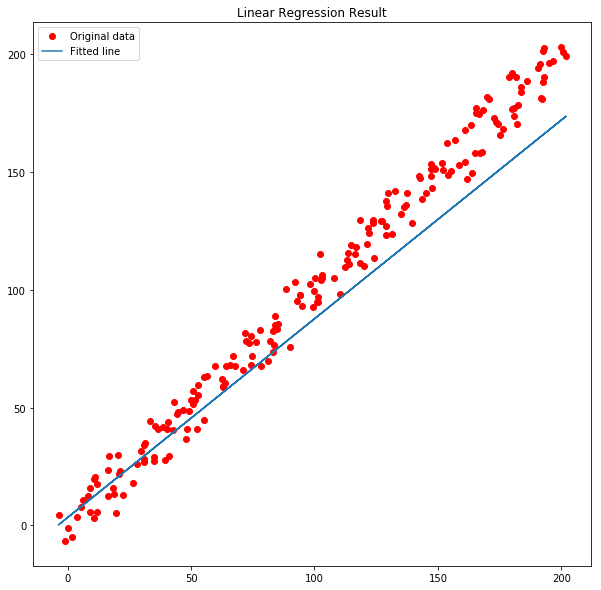

In [66]:
plt.figure(figsize = (10,10))
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, preds, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

In [67]:
error = [abs((i-j)/i) * 100 for i,j in zip(preds, y)]
np.mean(error)

28.39865779349366